In [1]:
import numpy as np
from functools import partial
import pandas as pd
#import matplotlib as mpl
#mpl.rcParams['legend.numpoints'] = 1
import matplotlib.pyplot as plt
%matplotlib inline 

from tabulate import tabulate

In [2]:
band_data = pd.read_csv("edelweiss_bands_GGA1.csv")
print (band_data.head(5))

# path 0: 68.75 keV inelastic scattering
# path 1: average NR line
# path 2: 13.26 keV inelastic
# path 3: ionization threshold
# path 4: lower nuclear recoil band
# path 5: upper nuclear recoil band
# path 6: upper and lower electron recoil band
band_data_svg = pd.read_csv("edelweiss_band_GGA1_allCurveData.txt", skiprows=1, header=None, delim_whitespace=True)
print (band_data_svg.head(5))
list(band_data_svg.columns.values)

       x   Curve1   curve2   curve3   curve4
0  1.667 -6.44581 -0.08957  1.49300 -0.64478
1  1.802 -6.06069 -0.08789  1.44296 -0.62392
2  1.804 -6.05415 -0.08786  1.46798 -0.62356
3  1.938 -5.68168 -0.08613  1.41795 -0.60321
4  2.075 -5.31531 -0.08430  1.39293 -0.58303
        0         1        2         3        4         5        6        7   \
0  69.4986  0.991839  1.02904  0.159922  14.2519  0.944224  2.10350  1.49896   
1  69.8626  0.987244  1.31515  0.167136  14.3933  0.936084  2.11548  1.48548   
2  70.2266  0.982648  1.60126  0.174349  14.5347  0.927944  2.12746  1.47200   
3  70.5907  0.978053  2.05730  0.181087  14.6761  0.919803  2.13943  1.45851   
4  70.9944  0.973552  2.45114  0.187750  14.8725  0.911724  2.15141  1.44503   

        8         9        10       11        12       13  
0  11.0197 -0.002028  1.89725  1.50072   9.99176  1.50730  
1  11.3235  0.005082  1.92804  1.48860  10.39770  1.48881  
2  11.6309  0.012183  1.95883  1.47648  10.78450  1.47030  
3  11.993

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

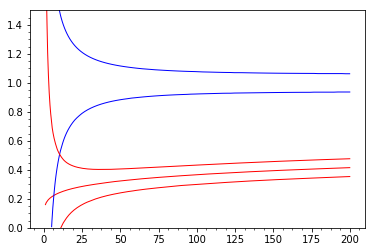

In [3]:
# 90% is +/- 1.645*sigma
# FWHM is 2.355*sigma

E_keV_arr = np.linspace(1,200,100)

# plot the central nuclear recoil line
plt.plot(band_data_svg[2], band_data_svg[3], 'r', linewidth=1)
#plt.plot(E_keV_arr, Q_avg(E_keV_arr),'r--')

# plot the data-theifed electron-recoil bands
plt.plot(band_data_svg[12][band_data_svg[13]>1], band_data_svg[13][band_data_svg[13]>1], 'b', linewidth=1)
plt.plot(band_data_svg[12][band_data_svg[13]<1], band_data_svg[13][band_data_svg[13]<1], 'b', linewidth=1)

# nuclear recoil bands
plt.plot(band_data_svg[8], band_data_svg[9], 'r', linewidth=1)
plt.plot(band_data_svg[10], band_data_svg[11], 'r', linewidth=1)

plt.ylim(0,1.5)
plt.minorticks_on()
#plt.grid(True)
plt.show()

In [6]:
# save the band data to a file

headers_ER_low = ["Erecoil_keV_low", "GGA1_ER_low"]
table_ER_low = np.column_stack([band_data_svg[12][band_data_svg[13]<1], band_data_svg[13][band_data_svg[13]<1]])
print (tabulate(table_ER_low, headers=headers_ER_low, tablefmt="plain", numalign="left"))

headers_ER_high = ["Erecoil_keV_high", "GGA1_ER_high"]
table_ER_high = np.column_stack([band_data_svg[12][band_data_svg[13]>1], band_data_svg[13][band_data_svg[13]>1]])

headers_NR = ["'Erecoil_keV_low'", "'GGA1_NR_low", "Erecoil_keV_high", "GGA1_NR_high"]
table_NR = np.column_stack([band_data_svg[8], band_data_svg[9], band_data_svg[10], band_data_svg[11]])

headers_NR_avg = ["'Erecoil_keV'", "GGA1_NR_mid"]
table_NR_avg = np.column_stack([band_data_svg[2], band_data_svg[3]])

if True:
    with open("edelweiss_ER_low_GGA1_curveData.txt", "w") as text_file:
        print(tabulate(table_ER_low, headers=headers_ER_low, tablefmt="plain", numalign="left"), file=text_file)
        
    with open("edelweiss_ER_high_GGA1_curveData.txt", "w") as text_file:
        print(tabulate(table_ER_high, headers=headers_ER_high, tablefmt="plain", numalign="left"), file=text_file)
        
    with open("edelweiss_NR_GGA1_curveData.txt", "w") as text_file:
        print(tabulate(table_NR, headers=headers_NR, tablefmt="plain", numalign="left"), file=text_file)
        
    with open("edelweiss_NR_avg_GGA1_curveData.txt", "w") as text_file:
        print(tabulate(table_NR_avg, headers=headers_NR_avg, tablefmt="plain", numalign="left"), file=text_file)

Erecoil_keV_low    GGA1_ER_low
5.08892            0.00772824
5.18512            0.0264365
5.28132            0.0451447
5.39755            0.0638469
5.51555            0.0825487
5.63262            0.101251
5.74844            0.119953
5.86425            0.138656
6.02034            0.157343
6.16382            0.17598
6.31036            0.194635
6.46154            0.213305
6.61847            0.231986
6.78224            0.250677
6.95393            0.269373
7.13465            0.288071
7.32548            0.306769
7.52753            0.325464
7.74189            0.344152
7.96964            0.362829
8.21189            0.381494
8.46972            0.400143
8.74424            0.418772
9.03653            0.437379
9.34769            0.45596
9.67882            0.474513
10.031             0.493034
10.4053            0.51152
10.829             0.529968
11.3136            0.548359
11.8201            0.56672
12.3312            0.585076
12.895             0.603357
13.5186            0.621532
14.2089        